In [1]:
# init part
import math
from math import factorial as f
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import statistics as stats
from scipy.stats import multinomial
import pandas as pd


def calcA(a, b):
    return (1. - b) / a


def calcB(a, b):
    return b / (1. - a)


def calcZ(n, X, theta0, theta1):
    return math.log(pmf(n, X, theta1) / pmf(n, X, theta0))


def pmf(n, X, P):
    xFactM = 1
    for x in X:
        xFactM *= f(x)
    pDegsM = 1
    for i in range(len(X)):
        pDegsM *= P[i] ** X[i]
    return f(n) * pDegsM / xFactM


def test1(scenario, theta0, theta1, a, b, N, isPrint):
    A = calcA(a, b)
    B = calcB(a, b)
    logB = math.log(B)
    logA = math.log(A)
    wrongs = 0
    observations = 0
    global iterations
    # 1000 запусков теста, к ним считается число ошибок
    for i in range(iterations):
        result = simpleTest(scenario, theta0, theta1, logA, logB, N)
        observations += result[1]
        if not result[0]:
            wrongs += 1
    if isPrint:
        print("simple test result for " + str(iterations) + " iterations")
        print("scenario: " + str(scenario))
        print("obeservations = " + str(observations))
        print("wrongs = " + str(wrongs))
    return observations, wrongs


def test1b(scenario, theta0, theta1, a, b, N, isPrint):
    A = calcA(a, b)
    B = calcB(a, b)
    logB = math.log(B)
    logA = math.log(A)
    wrongs = 0
    observations = 0
    global iterations
    # 500 запуск теста, к ним считается число ошибок
    for i in range(iterations):
        result = simpleTestWithCounter(scenario, theta0, theta1, logA, logB, N)
        observations += result[1]
        if not result[0]:
            wrongs += 1
    if isPrint:
        print("simple test result for " + str(iterations) + " iterations")
        print("scenario: " + str(scenario))
        print("obeservations = " + str(observations))
        print("wrongs = " + str(wrongs))
    return observations, wrongs


def test2(scenario, theta0, theta1, thetaNoise, a, b, N):
    w = 3


def simpleTest(scenario, theta0, theta1, logA, logB, N):
    accept = False  # True if scenario % 2 == 0 else
    thetaR = theta0 if scenario % 2 == 0 else theta1
    number = 0
    sumZ = 0
    values = []
    Zs = []
    counter = 0
    limit = 1
    while True:
        X = np.random.multinomial(N, thetaR, size=1)[0]
        values.append(X)
        Zs.append(calcZ(N, X, theta0, theta1))
        sumZ += Zs[-1]
        if scenario % 2 == 0:
            if sumZ >= logA:
                accept = False  # отклоняем H0
                break
            if sumZ <= logB:
                accept = True  # принимаем H0
                break
            if logB < sumZ < logA:
                number += 1
        elif scenario % 2 == 1:
            if sumZ >= logA:
                accept = True  # принимаем H1
                break
            if sumZ <= logB:
                accept = False  # отклоняем H1
                break
            if logB < sumZ < logA:
                number += 1
    return [accept, number]


def testNoisy1(scenario, theta0, theta1, logA, logB, N, eps, thetaN):
    thetaR = theta0 if scenario % 2 == 0 else theta1
    X = np.random.multinomial(N, thetaR, size=1)[0]
    number = 0
    sumZ = 0
    values = []
    Zs = []
    while True:
        picker = np.random.uniform(0, 1)
        if picker < eps:
            X = np.random.multinomial(N, thetaN, size=1)[0]
        else:
            X = np.random.multinomial(N, thetaR, size=1)[0]
        values.append(X)
        Zs.append(calcZ(N, X, theta0, theta1))
        sumZ += Zs[-1]
        if scenario % 2 == 0:
            if sumZ >= logA:
                accept = False  # отклоняем H0
                break
            if sumZ <= logB:
                accept = True  # принимаем H0
                break
            if logB < sumZ < logA:
                number += 1
        elif scenario % 2 == 1:
            if sumZ >= logA:
                accept = True  # принимаем H1
                break
            if sumZ <= logB:
                accept = False  # отклоняем H1
                break
            if logB < sumZ < logA:
                number += 1
    return [accept, number]


def simpleTestWithCounter(scenario, theta0, theta1, logA, logB, N):
    accept = False  # True if scenario % 2 == 0 else
    thetaR = theta0 if scenario % 2 == 0 else theta1

    X = np.random.multinomial(N, thetaR, size=1)[0]
    number = 0
    sumZ = 0
    values = []
    Zs = []
    counter = 0
    limit = 10
    while True:
        values.append(X)
        Zs.append(calcZ(N, X, theta0, theta1))
        sumZ += Zs[-1]
        if scenario % 2 == 0:
            if sumZ >= logA:
                accept = False  # отклоняем H0
                if counter >= limit:
                    break
                counter += 1
            if sumZ <= logB:
                accept = True  # принимаем H0
                if counter >= limit:
                    break
                counter += 1
            if logB < sumZ < logA:
                number += 1
        elif scenario % 2 == 1:
            if sumZ >= logA:
                accept = True  # принимаем H1
                if counter >= limit:
                    break
                counter += 1
            if sumZ <= logB:
                accept = False  # отклоняем H1
                if counter >= limit:
                    break
                counter += 1
            if logB < sumZ < logA:
                number += 1

    return [accept, number]


def avg(mas):
    return sum(mas) / len(mas)


def drawplot2d_h1(mas, name, isWrongs):
    mas = np.array(mas)
    print(mas)
    # f.write(*mas)
    # f.write("\n")
    yval = np.linspace(1, runs, runs)
    index = 1 if isWrongs else 0
    z = mas  # [mas[0][i] for i in range(len(mas[0]))]
    # print()
    plt.plot(yval, z)
    plt.xlabel(name)
    plt.savefig(name + '.jpg')
    plt.show()


def drawplot2d_2lines(mas1, mas2, line1, line2, plotname, isWrongs):
    mas1 = np.array(mas1)
    mas2 = np.array(mas2)
    # f.write(*mas)
    # f.write("\n")
    yval = np.linspace(1, runs, runs)
    index = 1 if isWrongs else 0
    z1 = mas1  # [mas[0][i] for i in range(len(mas[0]))]
    # print()
    plt.plot(yval, mas1, label=line1)
    plt.plot(yval, mas2, label=line2)
    plt.legend(loc='best')
    plt.xlabel(plotname)
    plt.savefig(plotname + '.jpg')
    plt.show()


def drawplot2d_2lines_c3(mas1, mas2, line1, line2, plotname, isWrongs):
    mas1 = np.array(mas1)
    mas2 = np.array(mas2)
    # f.write(*mas)
    # f.write("\n")
    yval = np.linspace(N, N + runs, runs)
    index = 1 if isWrongs else 0
    z1 = mas1  # [mas[0][i] for i in range(len(mas[0]))]
    # print()
    plt.plot(yval, mas1, label=line1)
    plt.plot(yval, mas2, label=line2)
    plt.legend(loc='best')
    plt.xlabel(plotname)
    plt.savefig(plotname + '.jpg')
    plt.show()


def visualise_pt1(result, case):
    drawplot2d_2lines(result[0][0], result[1][0], "верна H0", "верна H1", case + str(" наблюдения"), False)
    drawplot2d_2lines(result[0][1], result[1][1], "первого рода", "второго рода", case + str(" ошибки"), True)


def visualise_pt1_c3(result, case):
    drawplot2d_2lines(result[0][0], result[1][0], "верна H0", "верна H1", case + str(" наблюдения"), False)
    drawplot2d_2lines(result[0][1], result[1][1], "первого рода", "второго рода", case + str(" ошибки"), True)


def smallPrint(header, obses, wrongs, wrongsProb):
    print(header)
    print("Наблюдения|Ошибки|Вероятности ошибки")
    print(avg(obses), end='\t|')
    print(avg(wrongs), end='\t|')
    print(avg(wrongsProb))


def smallTable(result, name):
    mas1 = result[0]
    mas2 = result[1]
    tabledata = [["1"] + mas1, ["2"] + mas2]
    table = pd.DataFrame(tabledata, columns=["Верна гипотеза", "Наблюдения", "Ошибки", "Вероятность ошибки"]).style.hide_index()
    table.set_caption(name)
    return table



def simpleTestCase1(theta0, theta1, at, bt, runs, iterations):
    print("Входные:")
    print("H0 = " + str(theta0))
    print("H1 = " + str(theta1))
    print("a = " + str(at), end=', ')
    print("b = " + str(bt))
    wrongs0 = []
    wrongsProb0 = []
    obses0 = []
    wrongs1 = []
    wrongsProb1 = []
    obses1 = []

    print("pt1")
    for i in range(runs):
        res = test1(0, theta0, theta1, at, bt, N, False)
        obses0.append(res[0])
        wrongs0.append(res[1])
        wrongsProb0.append(res[1] / iterations)
    print("pt2")
    for i in range(runs):
        res = test1(1, theta0, theta1, at, bt, N, False)
        obses1.append(res[0])
        wrongs1.append(res[1])
        wrongsProb1.append(res[1] / iterations)
    # res0 = [avg(obses0), avg(wrongs0), avg(wrongsProb0)]
    # res1 = [avg(obses1), avg(wrongs1), avg(wrongsProb1)]
    # tabledata = [["1"] + res0, ["2"] + res1]
    # pd.DataFrame(tabledata, columns=["Верна гипотеза", "Наблюдения", "Ошибки", "Вероятность ошибки"]).style.hide_index()
    # print(smallTable(res0, res1, "Среднее значение параметров за "+str(runs)+" запусков"))
    smallPrint("Верная первая гипотеза", obses0, wrongs0, wrongsProb0)
    smallPrint("Верная вторая гипотеза", obses1, wrongs1, wrongsProb1)
    return [obses0, wrongs0, wrongsProb0], [obses1, wrongs1, wrongsProb1]


steps = 100
workNum = steps // 2
segments = 11


def testCase2(theta0, theta1, at, bt):
    print("\nТест 2 с помехами\nВходные:")
    print("H0 = " + str(theta0))
    print("H1 = " + str(theta1))
    global logAg
    global logBg
    wrongs = [[]] * segments  # (teta1 - teta0 + 1)
    observations = [[]] * segments  # (teta1 - teta0 + 1)
    cumWrongs = [[]] * segments  # (teta1 - teta0 + 1)
    cumObservations = [[]] * segments  # (teta1 - teta0 + 1)
    index = 0
    thetaNoise = theta0
    delta = [(theta1[i] - theta0[i]) / segments for i in range(len(theta0))]
    print("test 2 pt 1")
    while thetaNoise[0] > theta1[0]:
        cumWrong = 0.
        cumObs = 0.
        wrongs[index] = [0.] * workNum
        observations[index] = [0.] * workNum
        cumObservations[index] = [0.] * workNum
        cumWrongs[index] = [0.] * workNum

        for eps in range(0, workNum):
            wrong = 0.
            obs = 0.
            for i in range(iterations):
                res = testNoisy1(0, theta0, theta1, logAg, logBg, N, float(eps / workNum), thetaNoise)
                obs += res[1]
                if not res[0]:
                    wrong += 1
            wrongs[index][eps] = wrong
            observations[index][eps] = obs
            cumObs += obs
            cumWrong += wrong
            cumObservations[index][eps] = cumObs
            cumWrongs[index][eps] = cumWrong

        minW = min(wrongs[index])
        maxW = max(wrongs[index])
        avgW = stats.mean(wrongs[index])
        minO = min(observations[index])
        maxO = max(observations[index])
        avgO = stats.mean(observations[index])

        print("\nПри teta = " + str(thetaNoise) + "\nindex = " + str(index))
        print("min obs = " + str(minO) + "\nmin wrong = " + str(minW))
        print("max obs = " + str(maxO) + "\nmax wrong = " + str(maxW))
        print("\navg obs = " + str(avgO) + "\navg wrong = " + str(avgW))
        print("\navg chance wrong = " + str(avgW / iterations))
        index += 1
        for i in range(len(thetaNoise)):
            thetaNoise[i] += delta[i]

    return observations, wrongs, cumObservations, cumWrongs





def drawplot(mas, rotate, name):
    mas = np.array(mas)
    mas = mas.transpose()
    fig = plt.figure()
    axes = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(axes)
    xval = np.linspace(1, segments, segments)
    yval = np.linspace(0, 0.5, workNum)
    x, y = np.meshgrid(xval, yval)
    z = mas
    axes.plot_surface(x, y, z, rstride=5, cstride=5, cmap=cm.jet, label=name)
    axes.set_zlabel(name)
    axes.scatter(x, y, z, cmap=cm.jet)
    axes.view_init(rotate[0], rotate[1])
    plt.savefig(name + '.jpg')
    plt.show()


def drawplot_v1(mas, rotate, name, segments_v1, workNum_v1):
    mas = np.array(mas)
    mas = mas.transpose()
    fig = plt.figure()
    axes = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(axes)
    xval = np.linspace(1, segments_v1, segments_v1)
    yval = np.linspace(0, 0.5, workNum_v1)
    x, y = np.meshgrid(xval, yval)
    z = mas
    axes.plot_surface(x, y, z, rstride=5, cstride=5, cmap=cm.jet, label=name)
    axes.set_zlabel(name)
    axes.scatter(x, y, z, cmap=cm.jet)
    axes.view_init(rotate[0], rotate[1])
    plt.savefig(name + '.jpg')
    plt.show()


def drawplot_v2(mas, rotate, name, coeffs, workNum_v1):
    mas = np.array(mas)
    mas = mas.transpose()
    fig = plt.figure()
    axes = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(axes)
    xval = np.array(coeffs)
    yval = np.linspace(0, 0.5, workNum_v1)
    x, y = np.meshgrid(xval, yval)
    z = mas
    axes.plot_surface(x, y, z, rstride=5, cstride=5, cmap=cm.jet, label=name)
    axes.set_zlabel(name)
    axes.scatter(x, y, z, cmap=cm.jet)
    axes.view_init(rotate[0], rotate[1])
    plt.savefig(name + '.jpg')
    plt.show()


def simpleTestCase1b(theta0, theta1, at, bt, runs, iterations):
    print("Входные:")
    print("H0 = " + str(theta0))
    print("H1 = " + str(theta1))
    wrongs0 = []
    wrongsProb0 = []
    obses0 = []
    wrongs1 = []
    wrongsProb1 = []
    obses1 = []

    print("pt1")
    for i in range(runs):
        res = test1b(0, theta0, theta1, at, bt, N, False)
        obses0.append(res[0])
        wrongs0.append(res[1])
        wrongsProb0.append(res[1] / iterations)
    print("pt2")
    for i in range(runs):
        res = test1b(1, theta0, theta1, at, bt, N, False)
        obses1.append(res[0])
        wrongs1.append(res[1])
        wrongsProb1.append(res[1] / iterations)
    drawplot2d_2lines(obses0, obses1, "наблюдения H0", "наблюдения H1", "наблюдения при N in 100 - 150", False)
    drawplot2d_2lines(wrongs0, wrongs1, "ошибки 1 рода", "ошибки 2 рода", "ошибки при N in 100-150", True)
    # smallPrint("Верная первая гипотеза", obses0, wrongs0, wrongsProb0)
    # smallPrint("Верная вторая гипотеза", obses1, wrongs1, wrongsProb1)
    return [obses0, wrongs0, wrongsProb0], [obses1, wrongs1, wrongsProb1]


def simpleTestCase2(theta0, theta1, at, bt, runs, iterations):
    print("Входные:")
    print("H0 = " + str(theta0))
    print("H1 = " + str(theta1))
    wrongs0 = []
    wrongsProb0 = []
    obses0 = []
    wrongs1 = []
    wrongsProb1 = []
    obses1 = []

    print("pt1")
    for i in range(runs):
        res = test1(0, theta0, theta1, at, bt, N + i, False)
        obses0.append(res[0])
        wrongs0.append(res[1])
        wrongsProb0.append(res[1] / iterations)
    print("pt2")
    for i in range(runs):
        res = test1(1, theta0, theta1, at, bt, N + i, False)
        obses1.append(res[0])
        wrongs1.append(res[1])
        wrongsProb1.append(res[1] / iterations)

    print("obs 0: " + str(obses0))
    print("wrongs 0: " + str(wrongs0))
    print("obs 1: " + str(obses1))
    print("wrongs 1: " + str(wrongs1))

    drawplot2d_2lines_c3(obses0, obses1, "наблюдения H0", "наблюдения H1", "наблюдения при N in "+str(N) + " - "+str(N+runs), False)
    drawplot2d_2lines_c3(wrongs0, wrongs1, "ошибки 1 рода", "ошибки 2 рода", "ошибки при N in n "+str(N) + " - "+str(N+runs), True)
    smallPrint("Верная первая гипотеза", obses0, wrongs0, wrongsProb0)
    smallPrint("Верная вторая гипотеза", obses1, wrongs1, wrongsProb1)
    return [obses0, wrongs0], [obses1, wrongs1]


N = 50
runs = 130
iterations = 1000
theta0 = [1 / 6.] * 6
theta1 = [1 / 7.] * 5 + [2 / 7.]
theta1_a = [1 / 7.] * 5 + [2 / 7.]
theta1_b = [1 / 8.] * 5 + [3 / 8.]
theta1_c = [2 / 8.] + [1 / 8.] * 4 + [2 / 8.]
theta1_d = [1 / 8.] * 2 + [2 / 8.] + [1 / 8.] * 2 + [2 / 8.]
a = 0.05
b = 0.05
Ag = calcA(a, b)
Bg = calcB(a, b)
logBg = math.log(Bg)
logAg = math.log(Ag)

print("norm0")
print(sum(theta0))
print("norm1a = " + str(sum(theta1_a)))
print("norm1b = " + str(sum(theta1_b)))
print("norm1c = " + str(sum(theta1_c)))
print("norm1d = " + str(sum(theta1_d)))

print("a = " + str(a))
print("b = " + str(b))
print("запусков: " + str(runs))
print("итераций теста: " + str(iterations))


def part1():
    print("\ncase A\n")
    resA1 = simpleTestCase1(theta0, theta1_a, a, b, runs, iterations)
    print("\ncase B\n")
    resB1 = simpleTestCase1(theta0, theta1_b, a, b, runs, iterations)
    print("\ncase C\n")
    resC1 = simpleTestCase1(theta0, theta1_c, a, b, runs, iterations)
    print("\ncase D\n")
    resD1 = simpleTestCase1(theta0, theta1_d, a, b, runs, iterations)

    visualise_pt1(resA1, "case A")
    visualise_pt1(resB1, "case B")
    visualise_pt1(resC1, "case C")
    visualise_pt1(resD1, "case D")
    return [resA1, resB1, resC1, resD1]


def part2():
    print("\ncase A1")
    resA1 = simpleTestCase1(theta0, theta1_a, a, b, runs, iterations)

    print("\ncase A2")
    resA2 = simpleTestCase1(theta0, theta1_a, a, 2*b, runs, iterations)

    print("\ncase A3")
    resA3 = simpleTestCase1(theta0, theta1_a, 2*a, b, runs, iterations)

    print("\ncase A4")
    resA4 = simpleTestCase1(theta0, theta1_a, a, b/5, runs, iterations)

    print("\ncase A5")
    resA5 = simpleTestCase1(theta0, theta1_a, a / 5, b, runs, iterations)

    print("\ncase A6")
    resA6 = simpleTestCase1(theta0, theta1_a, a * 2, b / 5, runs, iterations)

    # visualise_pt1(resA1, "case A1")
    # visualise_pt1(resA2, "case A2")
    # visualise_pt1(resA3, "case A3")
    # visualise_pt1(resA4, "case A4")
    # visualise_pt1(resA5, "case A5")
    return [resA1,resA2,resA3,resA4,resA5, resA6]


def part3():
    print("\ncase A pt 3\n")
    resA = simpleTestCase2(theta0, theta1_a, a, b, runs, iterations)


r1_ = 30
r2_ = 170


def part4():
    print("pt 4 Noisy Test")
    res = testCase2(theta0, theta1, a, b)
    print(res[0])
    return res

norm0
0.9999999999999999
norm1a = 0.9999999999999999
norm1b = 1.0
norm1c = 1.0
norm1d = 1.0
a = 0.05
b = 0.05
запусков: 130
итераций теста: 1000


In [2]:
def testNoisy1_v1(scenario, theta0, theta1, N, eps, thetaN, coeff):
    global logAg
    global logBg
    logA = logAg
    logB = logBg
    thetaR = theta0 if scenario % 2 == 0 else theta1
    X = np.random.multinomial(N, thetaR, size=1)[0]
    number = 0
    sumZ = 0
    importance = 1.
    values = []
    Zs = []
    while True:
        picker = np.random.uniform(0, 1)
        X = np.random.multinomial(N, thetaR, size=1)[0]
        if picker < eps:
            X = np.random.multinomial(N, thetaN, size=1)[0]
        else:
            X = np.random.multinomial(N, thetaR, size=1)[0]
        values.append(X)
        newZ = calcZ(N, X, theta0, theta1) * importance
        Zs.append(newZ)
        sumZ += Zs[-1]
        if scenario % 2 == 0:
            if sumZ >= logA:
                sumZ -= Zs[-1]
                accept = False  # отклоняем H0
                break
            if sumZ <= logB:
                accept = True  # принимаем H0
                break
            if logB < sumZ < logA:
                number += 1
                # importance *= coeff ускоряющий коэфф
        elif scenario % 2 == 1:
            if sumZ >= logA:
                accept = True  # принимаем H1
                break
            if sumZ <= logB:
                accept = False  # отклоняем H1
                break
            if logB < sumZ < logA:
                number += 1
                # importance *= coeff ускоряющий коэфф
    return [accept, number]


def testCase2_v1(theta0, theta1, at, bt):
    print("\nТест 2 с помехами\nВходные:")
    print("H0 = " + str(theta0))
    print("H1 = " + str(theta1))
    global logAg
    global logBg
    segments_v1 = 10
    iterations_v1 = 1000
    workNum_v1 = 50
    wrongs = [[]] * segments_v1  # (teta1 - teta0 + 1)
    observations = [[]] * segments_v1  # (teta1 - teta0 + 1)
    cumWrongs = [[]] * segments_v1  # (teta1 - teta0 + 1)
    cumObservations = [[]] * segments_v1  # (teta1 - teta0 + 1)
    index = 0
    coeff = 1.5
    thetaNoise = [t for t in theta0]
    delta = [(theta1[i] - theta0[i]) / segments_v1 for i in range(len(theta0))]
    print("test 2 pt 2")
    while thetaNoise[0] > theta1[0] and index < segments_v1:
        cumWrong = 0.
        cumObs = 0.
        wrongs[index] = [0.] * workNum_v1
        observations[index] = [0.] * workNum_v1
        cumObservations[index] = [0.] * workNum_v1
        cumWrongs[index] = [0.] * workNum_v1

        for eps in range(0, workNum_v1):
            wrong = 0.
            obs = 0.
            for i in range(iterations_v1):
                res = testNoisy1_v1(1, theta0, theta1, N, float(eps / workNum_v1), thetaNoise, coeff)
                obs += res[1]
                if not res[0]:
                    wrong += 1
            wrongs[index][eps] = wrong
            observations[index][eps] = obs
            cumObs += obs
            cumWrong += wrong
            cumObservations[index][eps] = cumObs
            cumWrongs[index][eps] = cumWrong

        minW = min(wrongs[index])
        maxW = max(wrongs[index])
        avgW = stats.mean(wrongs[index])
        minO = min(observations[index])
        maxO = max(observations[index])
        avgO = stats.mean(observations[index])

        print("\nПри teta = ", end='[')
        for theta in thetaNoise:
            print(f'{theta:.4f}', end=', ')
        print("]\nindex = " + str(index))
        print("min obs = " + str(minO) + ", min wrong = " + str(minW))
        print("max obs = " + str(maxO) + ", max wrong = " + str(maxW))
        print("avg obs = " + str(avgO) + ", avg wrong = " + str(avgW))
        print("\navg chance wrong = " + str(avgW / iterations_v1))
        index += 1
        for i in range(len(thetaNoise)):
            thetaNoise[i] += delta[i]

    return observations, wrongs, cumObservations, cumWrongs, segments_v1, workNum_v1


def testCase2_v2(theta0, theta1, at, bt):
    print("\nТест 2 с помехами\nВходные:")
    print("H0 = " + str(theta0))
    print("H1 = " + str(theta1))
    global logAg
    global logBg
    coeffs = [1.1, 1.25, 1.5, 1.75, 2, 2.5, 3, 5]
    segments_v1 = len(coeffs)
    iterations_v1 = 1000
    workNum_v1 = 50
    wrongs = [[]] * segments_v1  # (teta1 - teta0 + 1)
    observations = [[]] * segments_v1  # (teta1 - teta0 + 1)
    cumWrongs = [[]] * segments_v1  # (teta1 - teta0 + 1)
    cumObservations = [[]] * segments_v1  # (teta1 - teta0 + 1)
    index = 0

    thetaNoise = [t for t in theta0]
    delta = [(theta1[i] - theta0[i]) / 2 for i in range(len(theta0))]
    for i in range(len(thetaNoise)):
        thetaNoise[i]+=delta[i]
    print("test 2 pt 2")
    for index in range(len(coeffs)):
        cumWrong = 0.
        cumObs = 0.
        wrongs[index] = [0.] * workNum_v1
        observations[index] = [0.] * workNum_v1
        cumObservations[index] = [0.] * workNum_v1
        cumWrongs[index] = [0.] * workNum_v1

        for eps in range(0, workNum_v1):
            wrong = 0.
            obs = 0.
            for i in range(iterations_v1):
                res = testNoisy1_v1(1, theta0, theta1, N, float(eps / workNum_v1), thetaNoise, coeffs[index])
                obs += res[1]
                if not res[0]:
                    wrong += 1
            wrongs[index][eps] = wrong
            observations[index][eps] = obs
            cumObs += obs
            cumWrong += wrong
            cumObservations[index][eps] = cumObs
            cumWrongs[index][eps] = cumWrong

        minW = min(wrongs[index])
        maxW = max(wrongs[index])
        avgW = stats.mean(wrongs[index])
        minO = min(observations[index])
        maxO = max(observations[index])
        avgO = stats.mean(observations[index])

        print("\nПри teta = ", end='[')
        for theta in thetaNoise:
            print(f'{theta:.4f}', end=', ')
        print("]\ncoeff = " + str(coeffs[index]))
        print("min obs = " + str(minO) + ", min wrong = " + str(minW))
        print("max obs = " + str(maxO) + ", max wrong = " + str(maxW))
        print("avg obs = " + str(avgO) + ", avg wrong = " + str(avgW))
        print("\navg chance wrong = " + str(avgW / iterations_v1))
        index += 1
        # for i in range(len(thetaNoise)):
        #     thetaNoise[i] += delta[i]

    return observations, wrongs, cumObservations, cumWrongs, segments_v1, workNum_v1, coeffs


def part4_v1():
    print("pt 4 Noisy Test")
    res = testCase2_v1(theta0, theta1, a, b)
    for r in res:
        print(r)
    return res


def part5_v2():
    print("pt 4 Noisy Test")
    res = testCase2_v2(theta0, theta1, a, b)
    for r in res:
        print(r)
    return res

In [111]:
def pt4Draw(res):
    drawplot(res[0], [r1_, -120], 'наблюдения H0')
    drawplot(res[0], [r1_, 140], 'наблюдения H0_')
    drawplot(res[1], [20, 105], 'ошибки первого рода')
    drawplot(res[1], [r1_, 195], 'ошибки первого рода_')

    drawplot(res[2], [25, 170], 'накопленные наблюдения H0')
    drawplot(res[3], [25, 170], 'накопленные ошибки первого рода')


def pt4Draw_v1(resv1):
    drawplot_v1(resv1[0], [r1_, -120], 'наблюдения H1', resv1[4], resv1[5])
    drawplot_v1(resv1[0], [r1_, 140], 'наблюдения H1_', resv1[4], resv1[5])
    drawplot_v1(resv1[1], [20, 15], 'ошибки второго рода', resv1[4], resv1[5])
    drawplot_v1(resv1[1], [r1_, 145], 'ошибки второго рода_', resv1[4], resv1[5])

    drawplot_v1(resv1[2], [25, 170], 'накопленные наблюдения H0', resv1[4], resv1[5])
    drawplot_v1(resv1[3], [25, 170], 'накопленные ошибки первого рода', resv1[4], resv1[5])


def pt5Draw_v2(resv1):
    drawplot_v2(resv1[0], [r1_, 10], 'наблюдения H1', resv1[6], resv1[5])
    drawplot_v2(resv1[0], [r1_, 70], 'наблюдения H1_', resv1[6], resv1[5])
    drawplot_v2(resv1[1], [15, -75], 'ошибки второго рода', resv1[6], resv1[5])
    drawplot_v2(resv1[1], [130, -75], 'ошибки второго рода_', resv1[6], resv1[5])

    drawplot_v2(resv1[2], [25, 20], 'накопленные наблюдения H1', resv1[6], resv1[5])
    drawplot_v2(resv1[3], [25, 190], 'накопленные ошибки второго рода', resv1[6], resv1[5])

In [67]:
res_v1 = part4_v1()

pt 4 Noisy Test

Тест 2 с помехами
Входные:
H0 = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
H1 = [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.2857142857142857]
test 2 pt 2

При teta = [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, ]
index = 0
min obs = 924.0, min wrong = 31.0
max obs = 1166.0, max wrong = 952.0
avg obs = 1078.06, avg wrong = 483.58

avg chance wrong = 0.48358

При teta = [0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1786, ]
index = 1
min obs = 899.0, min wrong = 29.0
max obs = 1296.0, max wrong = 923.0
avg obs = 1169.02, avg wrong = 441.06

avg chance wrong = 0.44106

При teta = [0.1619, 0.1619, 0.1619, 0.1619, 0.1619, 0.1905, ]
index = 2
min obs = 888.0, min wrong = 33.0
max obs = 1492.0, max wrong = 848.0
avg obs = 1245.24, avg wrong = 394.5

avg chance wrong = 0.3945

При teta = [0.1595, 0.1595, 0.1595, 0.1595, 0.1595, 0.2

In [ ]:
pt4Draw_v1(res_v1)

In [90]:
res_v2 = part5_v2()

pt 4 Noisy Test

Тест 2 с помехами
Входные:
H0 = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
H1 = [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.2857142857142857]
test 2 pt 2

При teta = [0.1548, 0.1548, 0.1548, 0.1548, 0.1548, 0.2262, ]
coeff = 1.1
min obs = 1100.0, min wrong = 21.0
max obs = 2530.0, max wrong = 425.0
avg obs = 1774.58, avg wrong = 176.78

avg chance wrong = 0.17678

При teta = [0.1548, 0.1548, 0.1548, 0.1548, 0.1548, 0.2262, ]
coeff = 1.25
min obs = 1012.0, min wrong = 26.0
max obs = 2101.0, max wrong = 445.0
avg obs = 1536.7, avg wrong = 191.18

avg chance wrong = 0.19118000000000002

При teta = [0.1548, 0.1548, 0.1548, 0.1548, 0.1548, 0.2262, ]
coeff = 1.5
min obs = 939.0, min wrong = 25.0
max obs = 1742.0, max wrong = 457.0
avg obs = 1330.78, avg wrong = 208.2

avg chance wrong = 0.2082

При teta = [0.1548, 0.1548, 0.1548,

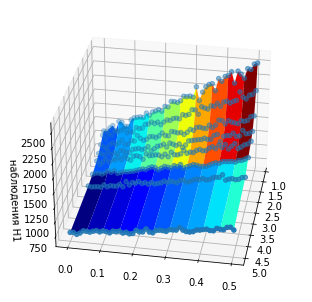

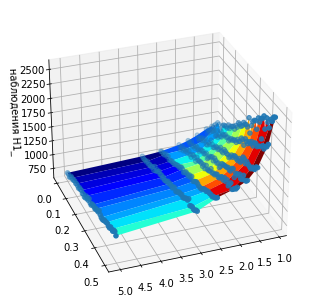

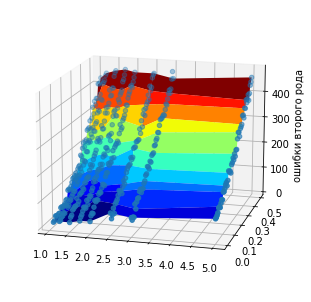

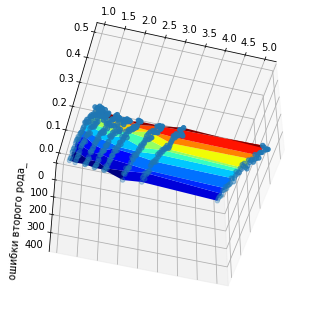

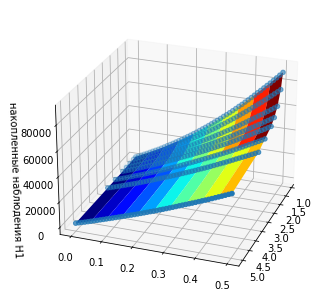

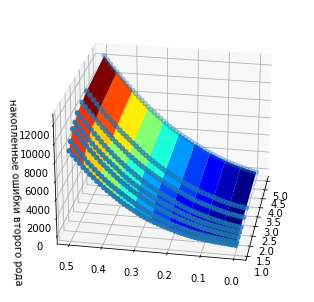

In [112]:
pt5Draw_v2(res_v2)


In [20]:
def table1(res, name):
    mas1 = [avg(res[0][0]),avg(res[0][1]),avg(res[0][2])]
    mas2 = [avg(res[1][0]),avg(res[1][1]),avg(res[1][2])]
    tabledata = [["1"] + mas1, ["2"] + mas2]
    table = pd.DataFrame(tabledata, columns=["Верна гипотеза", "Наблюдения", "Ошибки", "Вероятность ошибки"]).style.hide_index()
    table.set_caption(name)
    return table


def table2(res, name, _a, _b):
    mas1 = [avg(res[0][0]),avg(res[0][1]),avg(res[0][2])]
    mas2 = [avg(res[1][0]),avg(res[1][1]),avg(res[1][2])]
    tabledata = [["1"] + mas1, ["2"] + mas2]
    table = pd.DataFrame(tabledata, columns=["Верна гипотеза", "Наблюдения", "Ошибки", "Вероятность ошибки"]).style.hide_index()
    table.set_caption(name+"\na = "+str(_a)+", b = "+str(_b))
    return table


case A

Входные:
H0 = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
H1 = [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.2857142857142857]
a = 0.05, b = 0.05
pt1
pt2
Верная первая гипотеза
Наблюдения|Ошибки|Вероятности ошибки
3684.3	|21.946153846153845	|0.021946153846153824
Верная вторая гипотеза
Наблюдения|Ошибки|Вероятности ошибки
3418.8153846153846	|25.869230769230768	|0.02586923076923074

case B

Входные:
H0 = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
H1 = [0.125, 0.125, 0.125, 0.125, 0.125, 0.375]
a = 0.05, b = 0.05
pt1
pt2
Верная первая гипотеза
Наблюдения|Ошибки|Вероятности ошибки
1130.3461538461538	|16.43076923076923	|0.01643076923076921
Верная вторая гипотеза
Наблюдения|Ошибки|Вероятности ошибки
928.8923076923077	|16.176923076923078	|0.016176923076923058

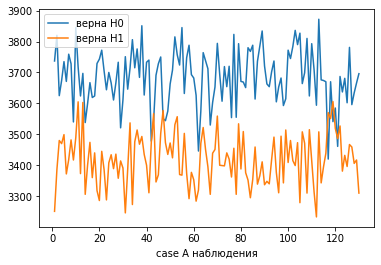

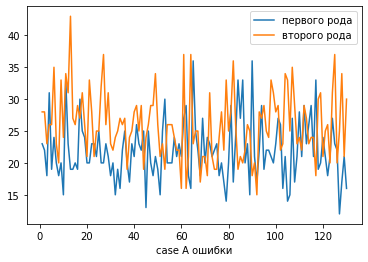

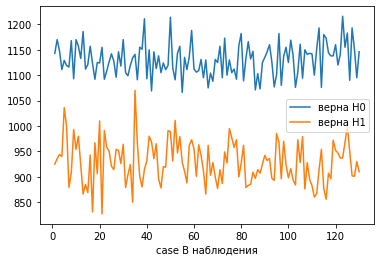

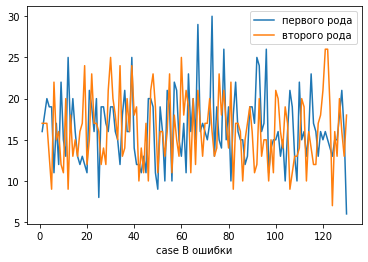

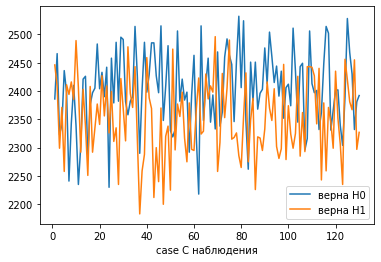

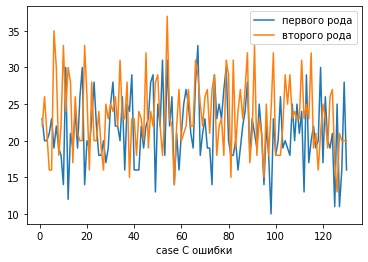

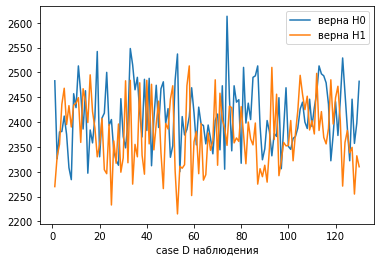

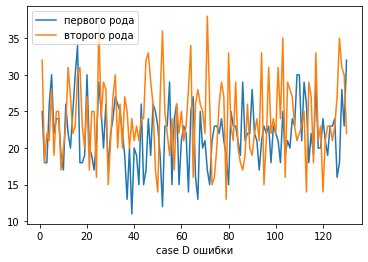

In [21]:
pt1 = part1()

In [22]:
table1(pt1[0], "Средние значения характеристик, набор A")

Верна гипотеза,Наблюдения,Ошибки,Вероятность ошибки
1,3684.300000,21.946154,0.021946
2,3418.815385,25.869231,0.025869


In [23]:
table1(pt1[1], "Средние значения характеристик, набор B")

Верна гипотеза,Наблюдения,Ошибки,Вероятность ошибки
1,1130.346154,16.430769,0.016431
2,928.892308,16.176923,0.016177


In [24]:
table1(pt1[2], "Средние значения характеристик, набор C")

Верна гипотеза,Наблюдения,Ошибки,Вероятность ошибки
1,2402.523077,21.300000,0.021300
2,2351.815385,23.353846,0.023354


In [25]:
table1(pt1[3], "Средние значения характеристик, набор D")

Верна гипотеза,Наблюдения,Ошибки,Вероятность ошибки
1,2410.876923,21.853846,0.021854
2,2375.938462,24.038462,0.024038


In [26]:
pt2 = part2()


case A1
Входные:
H0 = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
H1 = [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.2857142857142857]
a = 0.05, b = 0.05
pt1
pt2
Верная первая гипотеза
Наблюдения|Ошибки|Вероятности ошибки
3700.9384615384615	|22.053846153846155	|0.022053846153846146
Верная вторая гипотеза
Наблюдения|Ошибки|Вероятности ошибки
3415.2	|26.0	|0.02599999999999999

case A2
Входные:
H0 = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
H1 = [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.2857142857142857]
a = 0.05, b = 0.1
pt1
pt2
Верная первая гипотеза
Наблюдения|Ошибки|Вероятности ошибки
2735.5307692307692	|23.953846153846154	|0.023953846153846145
Верная вторая гипотеза
Наблюдения|Ошибки|Вероятно

In [27]:
table2(pt2[0], "Средние значения характеристик, набор A1", a, b)

Верна гипотеза,Наблюдения,Ошибки,Вероятность ошибки
1,3700.938462,22.053846,0.022054
2,3415.200000,26.000000,0.026000


In [28]:
table2(pt2[1], "Средние значения характеристик, набор A2", a, 2*b)

Верна гипотеза,Наблюдения,Ошибки,Вероятность ошибки
1,2735.530769,23.953846,0.023954
2,3109.415385,53.784615,0.053785


In [29]:
table2(pt2[2], "Средние значения характеристик, набор A3", 2*a, b)

Верна гипотеза,Наблюдения,Ошибки,Вероятность ошибки
1,3424.200000,43.861538,0.043862
2,2620.415385,28.576923,0.028577


In [30]:
table2(pt2[3], "Средние значения характеристик, набор A4", a, b/5)

Верна гипотеза,Наблюдения,Ошибки,Вероятность ошибки
1,5671.107692,22.415385,0.022415
2,3598.030769,5.600000,0.005600


In [31]:
table2(pt2[4], "Средние значения характеристик, набор A5", a/5, b)

Верна гипотеза,Наблюдения,Ошибки,Вероятность ошибки
1,3835.553846,5.130769,0.005131
2,5127.876923,26.230769,0.026231


In [32]:
table2(pt2[5], "Средние значения характеристик, набор A6", 2*a, b/5)

Верна гипотеза,Наблюдения,Ошибки,Вероятность ошибки
1,5449.430769,45.461538,0.045462
2,2778.600000,5.546154,0.005546



case A pt 3

Входные:
H0 = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
H1 = [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.2857142857142857]
pt1
pt2
obs 0: [3584, 3402, 3103, 3268, 3027, 3004, 2724, 2782, 2583, 2523, 2274, 2367, 2212, 1997, 2101, 1866, 2014, 1918, 1724, 1678, 1776, 1666, 1485, 1477, 1428, 1512, 1441, 1362, 1297, 1293, 1408, 1138, 1175, 1214, 1253, 1180, 973, 1099, 1020, 1122, 910, 943, 895, 1004, 886, 829, 836, 852, 910, 771, 811, 724, 834, 754, 650, 699, 723, 725, 568, 607, 605, 707, 677, 565, 573, 588, 598, 567, 528, 527, 600, 581, 482, 507, 514, 504, 454, 472, 491, 498, 474, 412, 410, 447, 430, 345, 393, 408, 378, 408, 369, 322, 372, 377, 311, 340, 312, 346, 338, 311, 317, 283, 340, 301, 292, 298, 322, 316, 238, 267, 269, 302, 238, 209, 233, 258, 280, 192, 235, 247, 249, 199, 218, 232, 252, 272, 193, 226, 195, 222]
wrongs 0

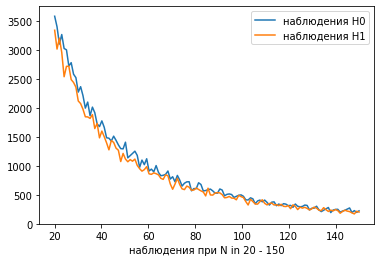

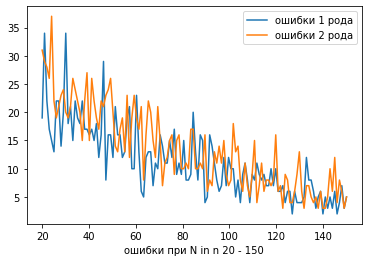

In [33]:
part3()

In [34]:
# res = part4()

pt 4 Noisy Test

Тест 2 с помехами
Входные:
H0 = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
H1 = [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.2857142857142857]
test 2 pt 1

При teta = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
index = 0
min obs = 3459.0
min wrong = 13.0
max obs = 3963.0
max wrong = 36.0

avg obs = 3686.92
avg wrong = 22.33

avg chance wrong = 0.02233

При teta = [0.16450216450216448, 0.16450216450216448, 0.16450216450216448, 0.16450216450216448, 0.16450216450216448, 0.17748917748917747]
index = 1
min obs = 4317.0
min wrong = 12.0
max obs = 4883.0
max wrong = 38.0

avg obs = 4614.69
avg wrong = 25.54

avg chance wrong = 0.02554

При teta = [0.1623376623376623, 0.1623376623376623, 0.1623376623376623, 0.1623376623376623, 0.1623376623376623, 0.18

KeyboardInterrupt: 

In [ ]:
pt4Draw(res)

In [ ]:
# rv = multinomial(8, [0.3, 0.2, 0.5])
# vector_p = [0.3, 0.2, 0.5]
# vector_x = np.random.multinomial(8, vector_p, size=1)[0]
# print(vector_x)
# print(pmf(8, vector_x, vector_p))
# print(rv.pmf(vector_x))
# for i in range(20):
#     print(np.random.binomial(N, 0.5, 3))
# print("multi")
# for i in range(20):
# print(np.random.multinomial(40, [1/7.]*5 + [2/7.], size=1))
# print(np.random.multinomial(40, [1/6.]*6, size=1))

